In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
iris = load_iris()
X, y = iris.data, iris.target

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([8, 7, 7], dtype=int64))

In [100]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_validation = sc.transform(X_validation)

In [101]:
accuracy_score_result = []
for i in range(1, 20, 2):
    # fit the classifier
    classfier = KNeighborsClassifier(n_neighbors=i, metric='minkowski')
    classfier.fit(X_train, y_train)

    # predict the values
    y_pred = classfier.predict(X_validation)

    # print accuracy score
    score = accuracy_score(y_validation, y_pred)

    accuracy_score_result.append(score)

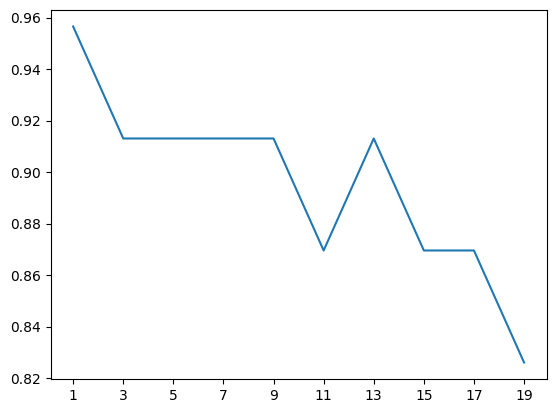

In [103]:
sns.lineplot(x = np.arange(1, 20, 2), y = accuracy_score_result)
plt.xticks([i for i in range(1,20,2)])
plt.show()